# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Jiongyang Xu.</p>
### <p style="text-align: right;"> &#9989; Xu-Jiongyang.</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [18]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Western Europe', 'Southern Europe', 'Ukraine'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'North Africa', 'Middle East']
    },
    'Africa': {
        'North Africa': ['Southern Europe', 'Egypt', 'East Africa', 'Congo'],
        'Egypt': ['North Africa', 'East Africa', 'Middle East'],
        'East Africa': ['North Africa', 'Egypt', 'Congo', 'South Africa', 'Madagascar'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        'Middle East': ['Southern Europe', 'Egypt', 'India', 'Afghanistan', 'Ukraine'],
        'India': ['Middle East', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia'],
        'China': ['India', 'Siam', 'Mongolia', 'Afghanistan', 'Ural', 'Siberia'],
        'Afghanistan': ['Middle East', 'China', 'Ural', 'Ukraine'],
        'Ural': ['China', 'Afghanistan', 'Siberia', 'Ukraine'],
        'Siberia': ['China', 'Ural', 'Yakutsk', 'Irkutsk', 'Mongolia'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Japan', 'Alaska'],
        'Mongolia': ['China', 'Siberia', 'Irkutsk', 'Kamchatka', 'Japan'],
        'Japan': ['Kamchatka', 'Mongolia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Eastern Australia', 'Western Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['New Guinea', 'Western Australia']
    }
}

### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [30]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    G = nx.Graph()
    
    for continent, territory_dict in territories.items():
        for territory, neighbors in territory_dict.items():
            G.add_node(territory, continent=continent)
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    
    return G


# Create the graph
G = create_risk_graph(risk_territories)


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

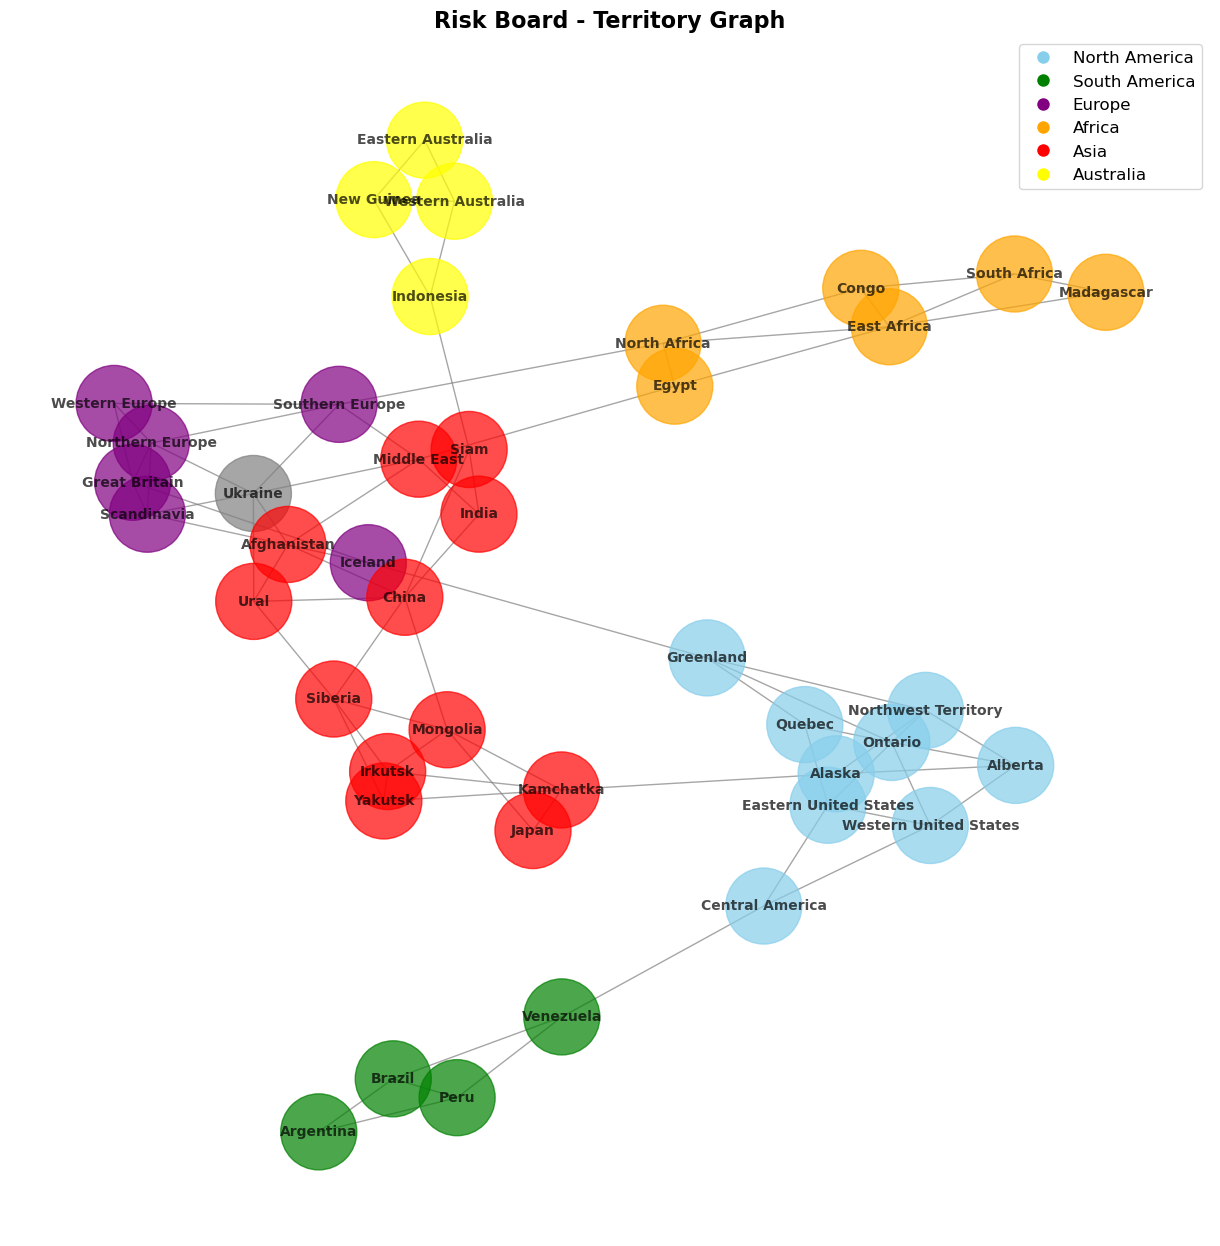

In [29]:
def visualize_risk_graph(G, layout_type='spring'):
    """
    Visualize the Risk board graph with the given layout, coloring nodes by continent.
    
    Parameters:
        G (nx.Graph): The NetworkX graph representing the Risk board
        layout_type (str): The layout type for positioning nodes. Choices are 'spring', 'circular', 'kamada_kawai', 'shell', 'spectral'.
        
    Returns:
        None
    """
    layouts = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'shell': nx.shell_layout,
        'spectral': nx.spectral_layout
    }
    
    if layout_type not in layouts:
        print(f"Invalid layout type: {layout_type}. Defaulting to 'spring'.")
        layout_type = 'spring'

    pos = layouts[layout_type](G)

    continent_colors = {
        'North America': 'skyblue',
        'South America': 'green',
        'Europe': 'purple',
        'Africa': 'orange',
        'Asia': 'red',
        'Australia': 'yellow'
    }
    
    node_colors = []
    for node in G.nodes:
        continent = G.nodes[node].get('continent', 'gray')  
        node_colors.append(continent_colors.get(continent, 'gray')) 
    
    plt.figure(figsize=(12, 12))  

    nx.draw(
        G, pos, with_labels=True, node_size=3000, node_color=node_colors,
        font_size=10, font_weight='bold', edge_color='gray', width=1.0, alpha=0.7
    )
    patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent)
               for continent, color in continent_colors.items()]
    plt.legend(handles=patches, loc='upper right', fontsize=12)
    plt.title("Risk Board - Territory Graph", fontsize=16, fontweight='bold')
    plt.show()

visualize_risk_graph(G, layout_type='spring')


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎ 1. The Kamada-Kawai layout provides the best visualization. This layout locates nodes based on their distance, which helps to visualize nodes more clearly。

2. The Kamada-Kawai layout is a force-directed graph drawing algorithm that positions nodes based on their graph-theoretic distances. It minimizes the energy of the system by treating the graph as a physical system where edges are springs and nodes repel each other. This results in a layout where nodes are placed in a way that reflects their relationships and distances in the graph. https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html

3.
#node_colors = []


#for node in G.nodes:

    #continent = G.nodes[node].get('continent', 'gray')  #Retrieves the 'continent' attribute for the node. If the attribute is missing, it defaults to 'gray'
    #node_colors.append(continent_colors.get(continent, 'gray')) #Maps the continent to a color. If the continent is not in the continent_colors dictionary, it defaults to 'gray'.

4. patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent) #Creates a custom legend element for each continent with a colored marker.

   for continent, color in continent_colors.items()] 
plt.legend(handles=patches, loc='upper right', fontsize=12) #Adds the legend to the plot with the specified location  and font size

5. #continent_colors = {
    'North America': 'skyblue',
    'South America': 'green',
    'Europe': 'purple',
    'Africa': 'orange',
    'Asia': 'red',
    'Australia': 'yellow'
}   # Each continent is manually assigned a color

6. nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color=node_colors,
    font_size=10, font_weight='bold', edge_color='gray', width=1.0, alpha=0.7
)

node_size=3000: Sets the size of the nodes.

font_size=10: Sets the size of the node labels.

font_weight='bold': Makes the node labels bold.

7. nx.draw(
        G, pos, with_labels=True, node_size=3000, node_color=node_colors,
        font_size=10, font_weight='bold', edge_color='gray', width=1.0, alpha=0.7
    )

   with_labels=True: Ensures that the node labels (territory names) are displayed on the graph.

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [31]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University